In [11]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '870ce723-570e-4543-9e3e-8cff466e8639',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [12]:
type(data)

dict

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [14]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

c:\Users\Kazuma Endo\nlp_playground\env\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9633,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.910129e+07,1.910129e+07,NaN,1,NaN,NaN,None,2022-07-23T21:33:00.000Z,22308.840763,2.303041e+10,-28.0091,0.041743,-1.803984,4.882031,7.239770,-24.469897,-43.646709,4.261277e+11,41.7813,4.684857e+11,None,2022-07-23T21:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 21:33:39.091354
1,1027,Ethereum,ETH,ethereum,5842,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.216691e+08,1.216691e+08,NaN,2,NaN,NaN,None,2022-07-23T21:32:00.000Z,1523.958741,1.448563e+10,-25.5306,0.452624,-0.877330,12.677073,34.673954,-22.757028,-48.244395,1.854187e+11,18.1773,1.854187e+11,None,2022-07-23T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 21:33:39.091354
2,825,Tether,USDT,tether,36583,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.584128e+10,6.816698e+10,NaN,3,NaN,NaN,None,2022-07-23T21:32:00.000Z,1.000024,4.150976e+10,-20.7341,-0.001564,-0.003839,0.025929,0.074850,0.103775,-0.024098,6.584286e+10,6.4558,6.816861e+10,None,2022-07-23T21:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-23 21:33:39.091354
3,3408,USD Coin,USDC,usd-coin,4937,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.508905e+10,5.508905e+10,NaN,4,NaN,NaN,None,2022-07-23T21:32:00.000Z,1.000033,5.210311e+09,-19.5748,-0.018526,-0.018197,0.005004,-0.019248,-0.026653,0.004410,5.509086e+10,5.3996,5.509086e+10,None,2022-07-23T21:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-23 21:33:39.091354
4,1839,BNB,BNB,bnb,1019,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-07-23T21:32:00.000Z,256.034479,1.085597e+09,-8.3924,0.179674,-3.004794,2.487435,12.556899,-21.706167,-36.061857,4.130790e+10,4.0496,5.120690e+10,None,2022-07-23T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 21:33:39.091354
5,4687,Binance USD,BUSD,binance-usd,4142,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,None,2022-07-23T21:32:00.000Z,0.998807,4.480827e+09,-29.9172,-0.228586,-0.207356,-0.029782,-0.215527,-0.244048,-0.068233,1.752630e+10,1.7184,1.752630e+10,None,2022-07-23T21:32:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-23 21:33:39.091354
6,52,XRP,XRP,xrp,778,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,None,2022-07-23T21:32:00.000Z,0.356341,8.542581e+08,-26.4921,0.622740,-0.562743,1.091462,7.169396,-12.558330,-49.056188,1.722664e+10,1.6885,3.563413e+10,None,2022-07-23T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 21:33:39.091354
7,2010,Cardano,ADA,cardano,521,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.393405e+10,3.451285e+10,NaN,8,NaN,NaN,None,2022-07-23T21:32:00.000Z,0.503849,7.262457e+08,-9.3115,4.003047,4.455375,10.952780,5.777290,-2.576401,-43.201589,1.709763e+10,1.6761,2.267319e+10,None,2022-07-23T21:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-23 21:33:39.091354
8,5426,Solana,SOL,solana,350,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.457620e+08,5.116169e+08,NaN,9,N

In [27]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '870ce723-570e-4543-9e3e-8cff466e8639',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    # For creating csv file for storing data
    # df = pd.json_normalize(data['data'])
    # df['timestamp'] = pd.to_datetime('now')
    # df
    # if not os.path.isfile(r'C:\Users\Kazuma Endo\OneDrive\Documents\Python Scripts\crypto_API.csv'):
    #     df.to_csv(r'C:\Users\Kazuma Endo\OneDrive\Documents\Python Scripts\crypto_API.csv', header='column_names')
    # else:
    #     df.to_csv(r'C:\Users\Kazuma Endo\OneDrive\Documents\Python Scripts\crypto_API.csv', mode='a', header=False)

In [28]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(60) # sleep for 1 minute
exit()

c:\Users\Kazuma Endo\nlp_playground\env\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Kazuma Endo\AppData\Local\Temp\ipykernel_81064\359048873.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


c:\Users\Kazuma Endo\nlp_playground\env\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Kazuma Endo\AppData\Local\Temp\ipykernel_81064\359048873.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed Successfully


KeyboardInterrupt: 

In [30]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.18387,-2.13481,4.70696,7.39201,-24.64361,-43.81133
Ethereum,0.03476,-1.18371,12.69158,34.87589,-22.94972,-48.32992
Tether,0.00019,-0.00397,0.02564,0.07845,0.10254,-0.02207
USD Coin,0.00042,-0.00637,-0.00180,-0.01419,-0.02108,-0.01203
BNB,-0.03414,-3.18299,2.36927,12.72798,-21.97728,-36.17791
Binance USD,-0.00974,-0.05412,-0.10950,-0.15107,-0.05827,-0.13665
Cardano,2.84640,4.82959,11.30021,6.99732,-2.45394,-42.97396
XRP,-0.03793,-0.93426,0.68966,6.72985,-13.14397,-49.35560
Solana,0.08796,-3.32020,-0.16012,5.02210,-20.33489,-60.62381


In [33]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.18387
           quote.USD.percent_change_24h    -2.13481
           quote.USD.percent_change_7d      4.70696
           quote.USD.percent_change_30d     7.39201
           quote.USD.percent_change_60d   -24.64361
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -2.01549
           quote.USD.percent_change_7d      4.48493
           quote.USD.percent_change_30d    13.89444
           quote.USD.percent_change_60d    -1.82796
           quote.USD.percent_change_90d   -51.86668
Length: 90, dtype: float64

In [34]:
type(df3)

pandas.core.frame.DataFrame

In [35]:
type(df4)

pandas.core.series.Series

In [36]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.18387
          quote.USD.percent_change_24h  -2.13481
          quote.USD.percent_change_7d    4.70696
          quote.USD.percent_change_30d   7.39201
          quote.USD.percent_change_60d -24.64361
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -2.01549
          quote.USD.percent_change_7d    4.48493
          quote.USD.percent_change_30d  13.89444
          quote.USD.percent_change_60d  -1.82796
          quote.USD.percent_change_90d -51.86668

[90 rows x 1 columns]

In [38]:
df5.count()

values    90
dtype: int64

In [41]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.18387
1,Bitcoin,quote.USD.percent_change_24h,-2.13481
2,Bitcoin,quote.USD.percent_change_7d,4.70696
3,Bitcoin,quote.USD.percent_change_30d,7.39201
4,Bitcoin,quote.USD.percent_change_60d,-24.64361
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-2.01549
86,Shiba Inu,quote.USD.percent_change_7d,4.48493
87,Shiba Inu,quote.USD.percent_change_30d,13.89444
88,Shiba Inu,quote.USD.percent_change_60d,-1.82796


In [46]:
df6 = df6.rename(columns={'level_1': 'percent_change'})

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [49]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

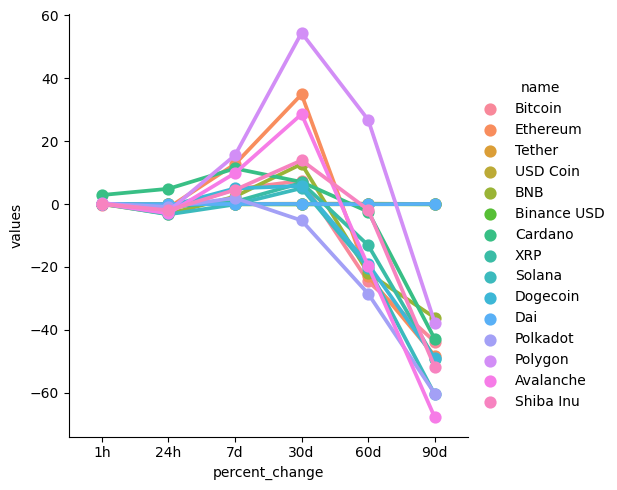

In [50]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [52]:
df_bitcoin = df[['name', 'quote.USD.price', 'timestamp']]
df_bitcoin = df7.query("name == 'Bitcoin'")
df_bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,22261.21415,2022-07-23 21:49:34.474499
0,Bitcoin,22251.63481,2022-07-23 21:52:45.645888
0,Bitcoin,22251.63481,2022-07-23 21:53:45.886720


c:\Users\Kazuma Endo\nlp_playground\env\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

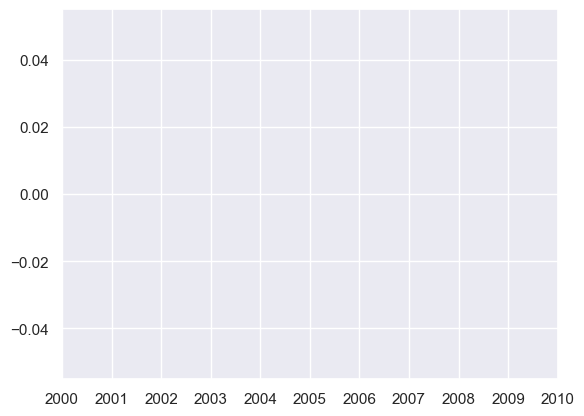

In [58]:
# sns.set_theme(style='darkgrid')
# sns.lineplot(x='timestamp',y='quote.USD.price', data=df_bitcoin)